In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

import warnings
warnings.filterwarnings('ignore')


In [ ]:
data = {
    'Date': pd.date_range(start='2023-01-01', periods=365, freq='D'),
    'Weather': np.random.choice(['Sunny', 'Rainy', 'Cloudy'], size=365),
    'Event': np.random.choice(['Festival', 'No Event', 'Holiday'], size=365),
    'Footfall': np.random.randint(1000, 5000, size=365)
}

df = pd.DataFrame(data)
print(df.head())


        Date Weather     Event  Footfall
0 2023-01-01   Rainy  No Event      4985
1 2023-01-02   Sunny  No Event      3801
2 2023-01-03   Sunny  Festival      3777
3 2023-01-04  Cloudy   Holiday      3447
4 2023-01-05  Cloudy  No Event      4223


In [ ]:
df['Weather'] = df['Weather'].map({'Sunny': 2, 'Cloudy': 1, 'Rainy': 0})
df['Event'] = df['Event'].map({'Festival': 2, 'Holiday': 1, 'No Event': 0})
df['DayOfYear'] = df['Date'].dt.dayofyear
df = df.drop('Date', axis=1)

print(df.head())


   Weather  Event  Footfall  DayOfYear
0        0      0      4985          1
1        2      0      3801          2
2        2      2      3777          3
3        1      1      3447          4
4        1      0      4223          5


In [ ]:
X = df.drop('Footfall', axis=1)
y = df['Footfall']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training data shape:", X_train.shape)
print("Testing data shape:", X_test.shape)


Training data shape: (292, 3)
Testing data shape: (73, 3)


In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")


Mean Squared Error: 1577187.582941619
R^2 Score: -0.024606983885811173


In [ ]:
new_data = pd.DataFrame({
    'Weather': [2],
    'Event': [2],
    'DayOfYear': [150]
})
predicted_footfall = model.predict(new_data)
print(f"Predicted Footfall: {int(predicted_footfall[0])}")


Predicted Footfall: 2877


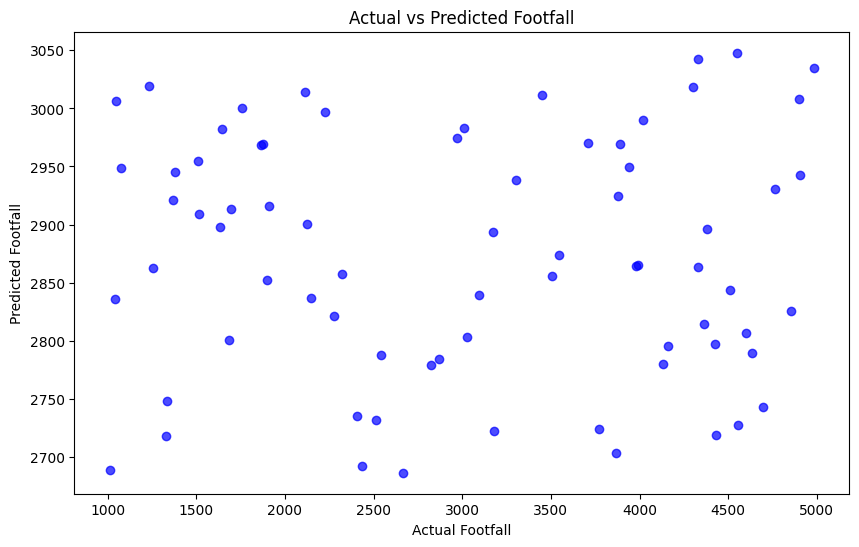

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.7, color='blue')
plt.xlabel('Actual Footfall')
plt.ylabel('Predicted Footfall')
plt.title('Actual vs Predicted Footfall')
plt.show()


In [ ]:
import joblib

# Save the model to a file
joblib.dump(model, 'footfall_predictor.pkl')


['footfall_predictor.pkl']